<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.10%20-%20Network%20Architectures%20-%20Restricted%20Boltzman%20Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [3]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

2024-04-05 16:28:18.205367: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 16:28:18.288701: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 16:28:18.639085: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 16:28:20.670602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline

# **Máquinas Bolztman restringidas (Restringed Boltzman Machine)**

## **Introducción**

Una máquina de Boltzmann es un tipo de red neuronal que utiliza principios de la mecánica estadística para simular sistemas complejos. Fue inventado por Geoffrey Hinton y Terry Sejnowski a principios de los años 1980.

Los modelos basados en energía (EBM) son una clase de modelos de aprendizaje automático que se utilizan para representar y aprender la estructura subyacente de distribuciones de probabilidad complejas. Estos modelos definen una función de energía escalar que asigna un número real a cada configuración de los datos de entrada, y la probabilidad de una configuración es proporcional al exponente de la energía negativa. La función de energía puede considerarse como una medida de qué tan bien se ajustan los datos de entrada al modelo y puede usarse para calcular la probabilidad de los datos.

Las máquinas de Boltzmann (BM) son un tipo de modelo basado en energía que se compone de unidades interconectadas que son similares a las neuronas, y las conexiones entre estas unidades son simétricas. Estas unidades toman decisiones probabilísticas sobre si estar en estado activo o inactivo.

Las conexiones entre las unidades son simétricas, lo que significa que la fuerza de la conexión entre las dos unidades es la misma en ambas direcciones. Por ejemplo, si tenemos dos unidades A y B en una Máquina Boltzmann, y hay una conexión de A a B con un peso determinado, también habrá una conexión de B a A con el mismo peso. Esta simetría garantiza que la red pueda aprender patrones en los datos independientemente del orden en que se presenten las unidades a la red.

En un modelo probabilístico, en lugar de dar un único resultado determinista para un insumo determinado, el modelo proporciona una distribución de probabilidad sobre los posibles resultados. Una decisión estocástica es una decisión que se toma aleatoriamente, basándose en una distribución de probabilidad. En una máquina de Boltzmann, cada unidad toma una decisión estocástica sobre si estar activa o inactiva en función de la distribución de probabilidad definida por la red. Esta aleatoriedad ayuda a la máquina Boltzmann a explorar diferentes configuraciones de las unidades y a converger en las configuraciones más probables según los datos de entrada.

La máquina de Boltzmann es principalmente un algoritmo de aprendizaje no supervisado. 

Se utiliza para tareas como:
* Reducción de dimensionalidad
* Aprendizaje de funciones y agrupación en clústeres no supervisados, donde no hay datos etiquetados disponibles para entrenar la red.



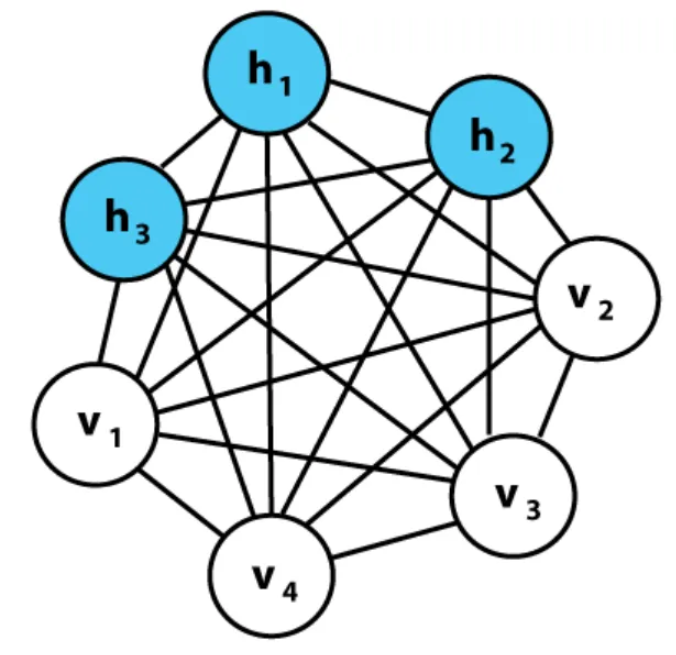

In [5]:
Image(filename='local/imgs/BM.png')

### **Historia**

El origen de las máquinas Boltzmann se remonta a finales de la década de 1970, cuando Geoffrey Hinton y Terry Sejnowski introdujeron estos modelos probabilísticos. El nombre "Máquina de Boltzmann" se inspira en la distribución de Boltzmann en mecánica estadística, que lleva el nombre del físico austriaco Ludwig Boltzmann. A lo largo de los años, estos modelos han sufrido importantes transformaciones y adaptaciones, allanando el camino para diversos avances en el campo de la inteligencia artificial y el aprendizaje automático.

Década de 1970: primeras concepciones y desafíos La fundación de las máquinas de Boltzmann puede atribuirse al desarrollo de redes neuronales artificiales en las décadas de 1960 y 1970. Sin embargo, fue a finales de la década de 1970 cuando se formuló explícitamente el concepto de máquinas Boltzmann. Inicialmente, estos modelos enfrentaron desafíos en el entrenamiento debido a su dependencia de los métodos Monte Carlo de la cadena de Markov (MCMC), que eran computacionalmente costosos y propensos a problemas de convergencia.

Década de 1980: Descubriendo el poder de los modelos basados ​​en energía En la década de 1980, físicos e investigadores en el campo de la mecánica estadística desarrollaron aún más el concepto de máquina de Boltzmann. Fue durante este tiempo que las máquinas de Boltzmann fueron reconocidas como modelos basados ​​en energía, que utilizaban conceptos de la mecánica estadística para describir las interacciones entre neuronas. A pesar de su elegancia teórica, el entrenamiento de las máquinas Boltzmann siguió siendo un desafío.

Década de 1990: Liberación del poder de las máquinas Boltzmann restringidas El avance de las máquinas Boltzmann se produjo en la década de 1990, cuando se introdujo el concepto de máquinas Boltzmann restringidas (RBM). Los RBM, una variante de las máquinas Boltzmann, eran más manejables y fáciles de entrenar. La introducción del algoritmo de aprendizaje de divergencia contrastiva por Hinton en 2002 simplificó aún más el proceso de entrenamiento, permitiendo a los RBM modelar eficientemente distribuciones de datos y realizar reducción de dimensionalidad.

Década de 2000: un renacimiento del interés Con la llegada del aprendizaje profundo y la creciente disponibilidad de potencia computacional, el interés por las máquinas Boltzmann experimentó un resurgimiento en la década de 2000. Los investigadores comenzaron a explorar arquitecturas y variaciones novedosas, incluidas Deep Boltzmann Machines y Deep Belief Networks, que combinaban múltiples capas de RBM para crear potentes modelos generativos.

Antes de profundizar en los detalles de las máquinas de Boltzmann, comprendamos la base sobre la que se construyen: el modelado probabilístico. En esencia, el modelado probabilístico se ocupa de la representación de la incertidumbre y la aleatoriedad en los datos. En lugar de generar resultados deterministas, los modelos probabilísticos asignan probabilidades a diferentes resultados, lo que permite una comprensión más integral de los sistemas complejos.

Supongamos un RBM (Restringed Boltzman Machine) con $n_i$ neuronas de entrada, $\mathbf{v} \in \mathbf{V} = [0,1]^{n_i}$, y $n_h$ unidades ocultas, $\mathbf{h} \in \mathbf{H} = [0,1]^{n_h}$. Observe que las entradas y las unidades ocultas son binarias. En esta pequeña configuración $|\mathbf{V}|=2^{n_i}$ y $|\mathbf{H}|=2^{n_h}$. Normalmente, $\mathbf{V}$ tendría una dimensión muy alta (imágenes, etc.)

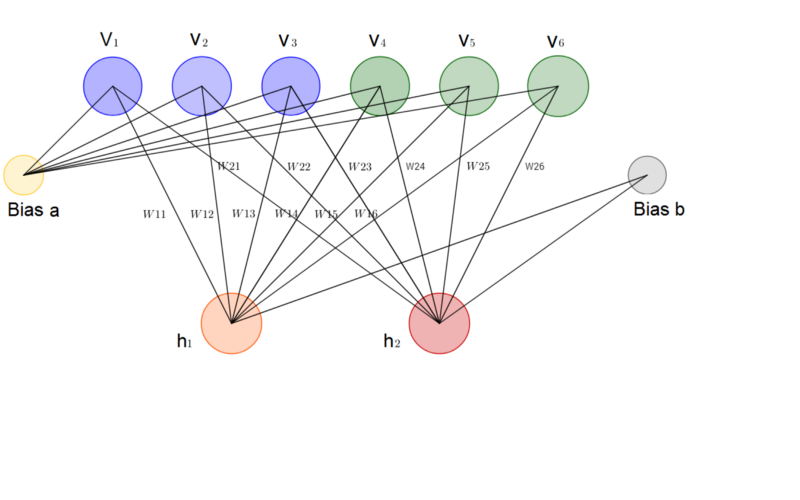

In [29]:
Image(filename='local/imgs/rbm.png')

una función de probabilidad sobre los vectores $\mathbf{h}$ y $\mathbf{v}$ se define a través de una función de energía $E(\mathbf{v},\mathbf{h})$ de la siguiente manera


$$E(\mathbf{v},\mathbf{h}) = - \mathbf{h}^T \mathbf{W} \mathbf{v} - \mathbf{c}^T\mathbf{v} - \mathbf{b}^T\mathbf{h}$$
$$p(\mathbf{v}, \mathbf{h}|\theta) = \frac{e^{-E(\mathbf{v}, \mathbf{h})}}{Z}$$

con:

- $\mathbf{W} \in \mathbb{R}^{n_h \times n_i}$, la matriz de pesos de las conexiones entre las neuronas ocultas y de entrada
- $\mathbf{c} \in \mathbb{R}^{n_i}$, el término de sesgo para las neuronas de entrada
- $\mathbf{b} \in \mathbb{R}^{n_h}$, el término de sesgo para las neuronas ocultas
- $\theta = [\mathbf{W}, \mathbf{c}, \mathbf{b}]$
- $Z = \sum_{\mathbf{v} \in \mathbf{V}, \mathbf{h} \in \mathbf{H}} e^{-E(\mathbf{v},\mathbf{h} )}$, término de normalización generalmente difícil de calcular (en esta configuración tan pequeña aún podremos calcularlo).

marginando sobre $\mathbf{h}$ obtenemos:

$$p(\mathbf{v}|\theta) = \sum_{\mathbf{h}\in \mathbf{H}} p(\mathbf{v}, \mathbf{h}|\theta) = \sum_ {\mathbf{h}\in \mathbf{H}} \frac{e^{-E(\mathbf{v}, \mathbf{h})}}{Z} = \frac{e^{-\mathcal {F}(\mathbf{v})}}{Z}$$


donde $\mathcal{F}$ es la **energía libre** para un vector de entrada y se define como


$$\mathcal{F}(\mathbf{v}) = -\Bigg[\mathbf{c}^T \mathbf{v} + \sum_{j} log(1+e^{b_j+\mathbf{W} _j\mathbf{v}})\Bigg]$$

tenga en cuenta que, $j \in [0,..,dim(H)-1]$, **sorprendentemente**, esto termina siendo un resumen del número de unidades ocultas.

Por lo tanto,

$$p(\mathbf{v}|\theta) \propto e^{-\mathcal{F}( \mathbf{v})}$$

### Dado un conjunto de datos de entrenamiento 

$\mathbf{V}_{tr} \subset \mathbf{V}$, queremos obtener $\theta = [\mathbf{W}, \mathbf{c}, \mathbf{b]}$ para que la probabilidad del conjunto de entrenamiento sea lo más grande posible $\rightarrow$ la energía libre de los datos del tren sea lo más baja posible.


Consulte aquí para ver ejemplos más amplios con TensorFlow: https://github.com/monsta-hd/boltzmann-machines

## **Ejemplo**


Supongamos un RBM con $4$ neuronas de entrada, $\mathbf{v} \in \mathbf{V} = [0,1]^6$, y $3$ unidades ocultas, $\mathbf{h} \in \mathbf{H } = [0,1]^{5}$.

In [33]:
X_domain = np.r_[[i for i in itertools.product([0,1], repeat=dim_V)]]
X_domain.shape

(64, 6)

In [30]:
import itertools

dim_V = 6
dim_H = 5

X_domain = np.r_[[i for i in itertools.product([0,1], repeat=dim_V)]]
print("All possible input values")
print(X_domain)

All possible input values
[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 1 0]
 [0 0 1 0 1 1]
 [0 0 1 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 1 1 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 1 0 1 0 0]
 [0 1 0 1 0 1]
 [0 1 0 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 1 0 1 1]
 [0 1 1 1 0 0]
 [0 1 1 1 0 1]
 [0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [1 0 0 0 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]
 [1 0 0 1 1 0]
 [1 0 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 1 0 0 1]
 [1 0 1 0 1 0]
 [1 0 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 1 1 0 1]
 [1 0 1 1 1 0]
 [1 0 1 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 1 0]
 [1 1 0 0 1 1]
 [1 1 0 1 0 0]
 [1 1 0 1 0 1]
 [1 1 0 1 1 0]
 [1 1 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]


In [6]:
def free_energy(v,c,b,W):
    v = v.reshape(-1, v.shape[-1])
    return - v.dot(c)- np.logaddexp(0, v.dot(W.T) + b).sum(axis=1)

In [7]:
def plot_free_energy(X_domain, X_train, c,b,W):
    plt.figure(figsize=(20,3))
    energies = free_energy(X_domain, c, b ,W)
    plt.bar(list(range(len(energies))), energies, 0.4, label="full domain", alpha=.5)
    plt.xticks(list(range(len(X_domain))), [str(i) for i in X_domain], rotation="vertical");

    X_idxs = np.r_[[np.sum(i == X_domain, axis=1)==X_domain.shape[1] for i in X_train]].T.sum(axis=1).astype(bool)

    plt.bar(np.arange(len(X_domain))[X_idxs], energies[X_idxs], .9, label="train data")
    plt.ylabel("free energy")
    plt.legend();

### creamos un conjunto aleatorio (no entrenado) de ponderaciones y sesgos para nuestro RBM

In [8]:
rc = np.random.normal(size=dim_V)
rb = np.random.normal(size=dim_H)
rW = np.random.normal(size=(dim_H,dim_V))

### y selecciona un conjunto de datos de entrenamiento que <font color="red">contenga algún patrón<font>

por ejemplo que sean consecutivos

In [9]:
k = np.random.randint(len(X_domain)-10)
X_train = X_domain[k:k+10]
X_rest  = np.r_[[i for i in X_domain if np.sum([np.allclose(i,j) for j in X_train])==0]]
X_train

array([[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1]])

In [10]:
len(X_rest), len(X_train)

(54, 10)

### observar la energía libre asignada por los pesos aleatorios a nuestros datos
incluyendo los datos del tren recién seleccionado

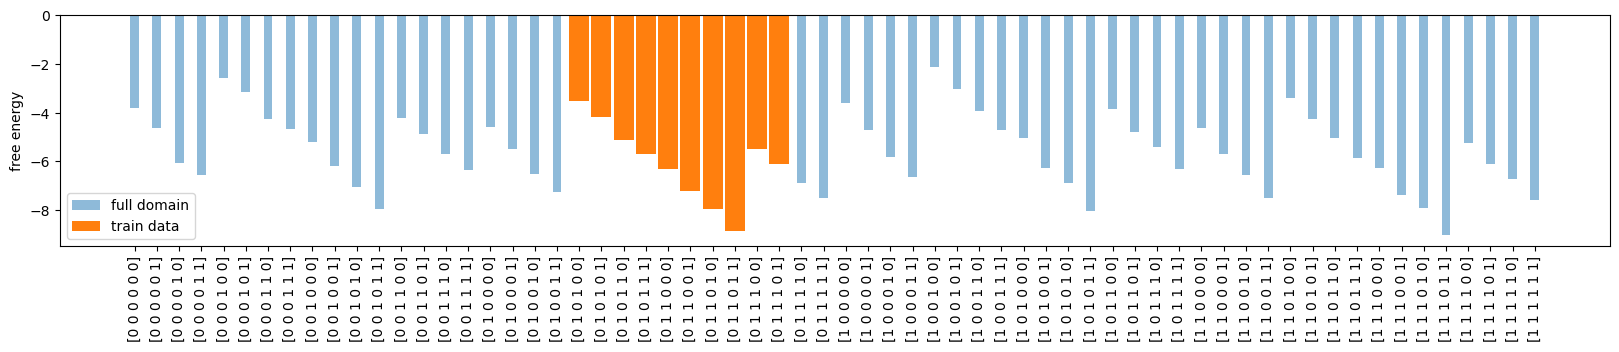

In [11]:
plot_free_energy(X_domain, X_train, rc, rb, rW)

### observar como, después del entrenamiento, nuestros datos de entrenamiento tienen menos energía (más probabilidad)

$\Rightarrow$ el proceso de entrenamiento ha creado una distribución de probabilidad donde nuestros datos de entrenamiento son más probables que el resto

$\Rightarrow$ además, los elementos pdata con patrones similares a los datos de entrenamiento (aunque no forman parte del conjunto de trenes seleccionado) también reciben una gran probabilidad. La GBR está **generalizando**.

In [12]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=dim_H, batch_size=1, learning_rate=.01,n_iter=1000, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_

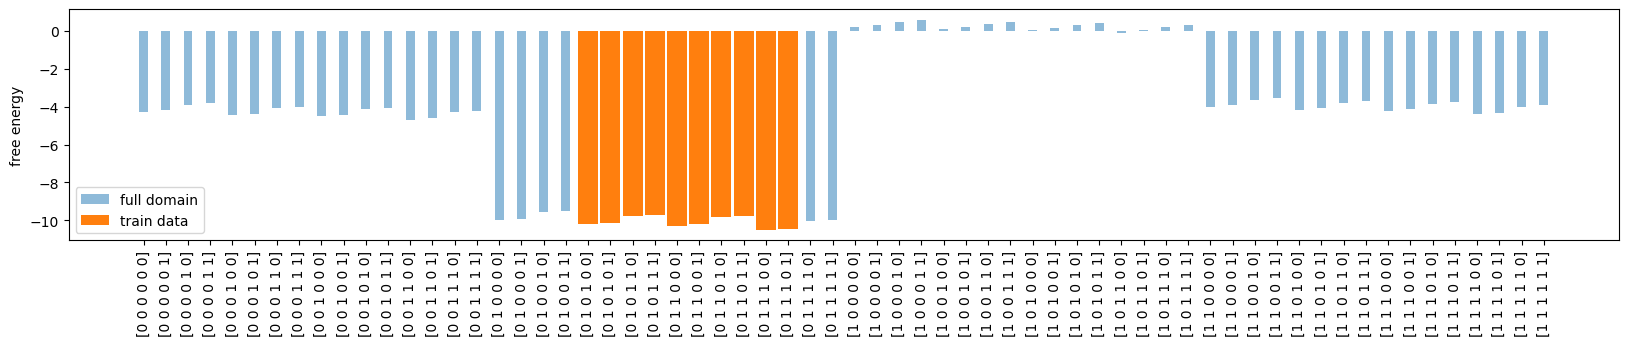

In [13]:
plot_free_energy(X_domain, X_train, c, b, W)

### Dado un conjunto de parámetros RBM, medimos la relación entre la energía libre de los datos de entrenamiento y el resto.


$$r\mathcal{F} = \frac{\mathcal{F}(\mathbf{X_{tren}})}{\mathcal{F}(\mathbf{X_{rest}})} $$

donde $\mathbf{v} \in \mathbf{X_{rest}}$ **sii** $\mathbf{v} \notin \mathbf{X_{train}}$

In [14]:
def rF(X_train, X_rest, c,b,W):
    return np.mean(free_energy(X_train, c, b, W)) / np.mean(free_energy(X_rest, c, b, W))

observe cómo $r\mathcal{F}$ aumenta después del entrenamiento cuantificando lo que acabamos de ilustrar gráficamente

In [15]:
print("rF (random params)  = %.3f"%rF(X_train, X_rest, rc, rb, rW))
print("rF (after training) = %.3f"%rF(X_train, X_rest, c, b, W))

rF (random params)  = 1.080
rF (after training) = 2.927


### observa qué sucede si nuestros datos de entrenamiento no contienen ningún patrón notable

lo seleccionamos al azar

In [16]:
X_train = np.random.permutation(X_domain)[:10]
X_rest  = np.r_[[i for i in X_domain if np.sum([np.allclose(i,j) for j in X_train])==0]]
X_train

array([[0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 1]])

**energía con parámetros aleatorios**

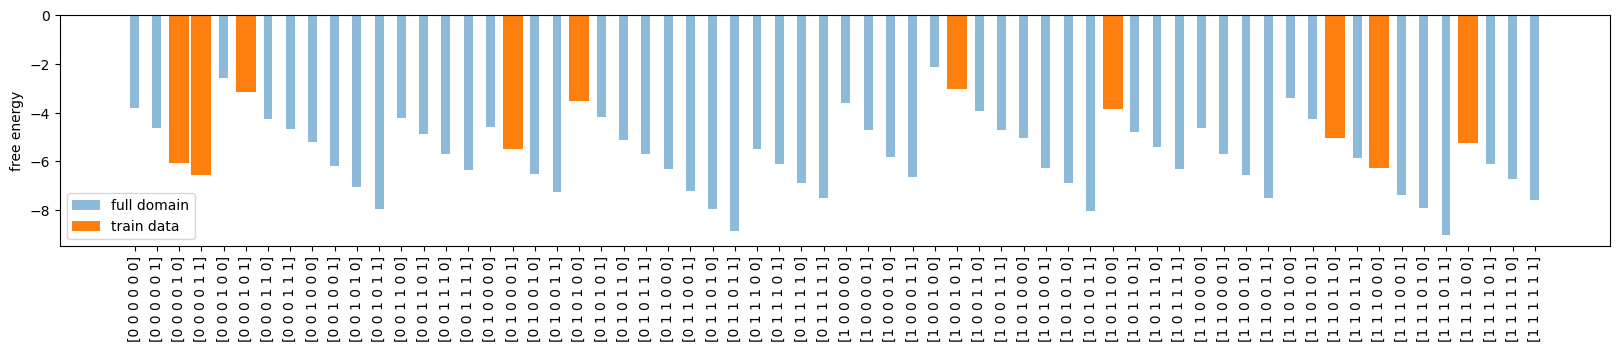

In [17]:
plot_free_energy(X_domain, X_train, rc, rb, rW)

**energía después del entrenamiento**

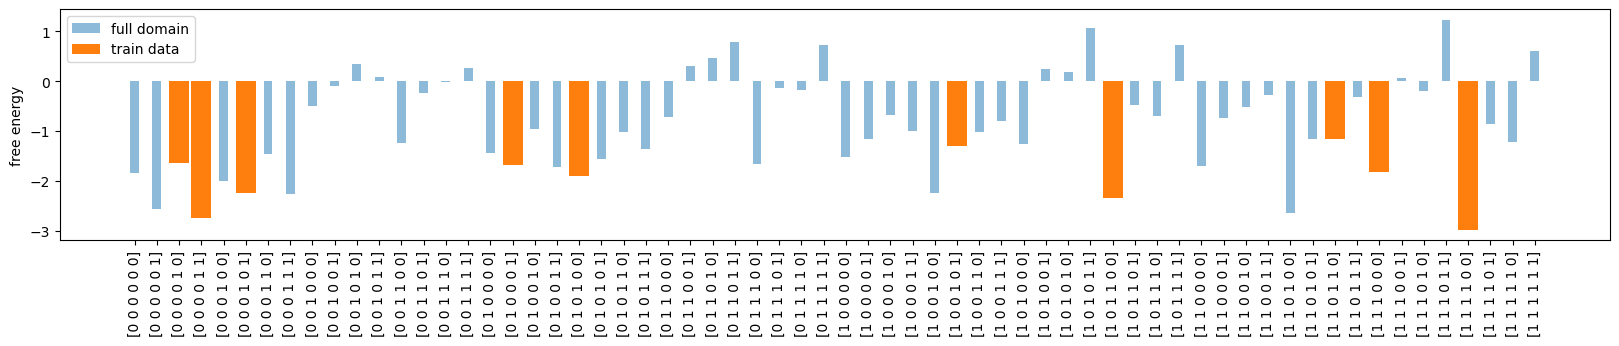

In [18]:
rbm = BernoulliRBM(n_components=3, batch_size=1, learning_rate=.01,n_iter=1000, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
plot_free_energy(X_domain, X_train, c, b, W)

**relación de energía libre**

In [19]:
print("rF (random params)  = %.3f"%rF(X_train, X_rest, rc, rb, rW))
print("rF (after training) = %.3f"%rF(X_train, X_rest, c, b, W))

rF (random params)  = 0.829
rF (after training) = 2.956


### ¡¡¡RBM todavía intenta hacer que los datos de entrenamiento sean más probables!!! (menos energía libre)

## Volvamos al ejemplo del patrón.

Ahora construimos patrones con el operador de módulo, observemos que con el módulo principal (es decir, `pattern_modulus=7`), el RBM tiene dificultades para obtener una distribución que separe los datos de entrenamiento. Juegue con los parámetros de RBM (`n_iter, learning_rate, n_components, batch_size`)

In [20]:
dim_H = 2

pattern_modulus = 7

X_train = X_domain[[np.sum(i*(2**np.arange(len(i))[::-1]))%pattern_modulus==0 for i in X_domain]]

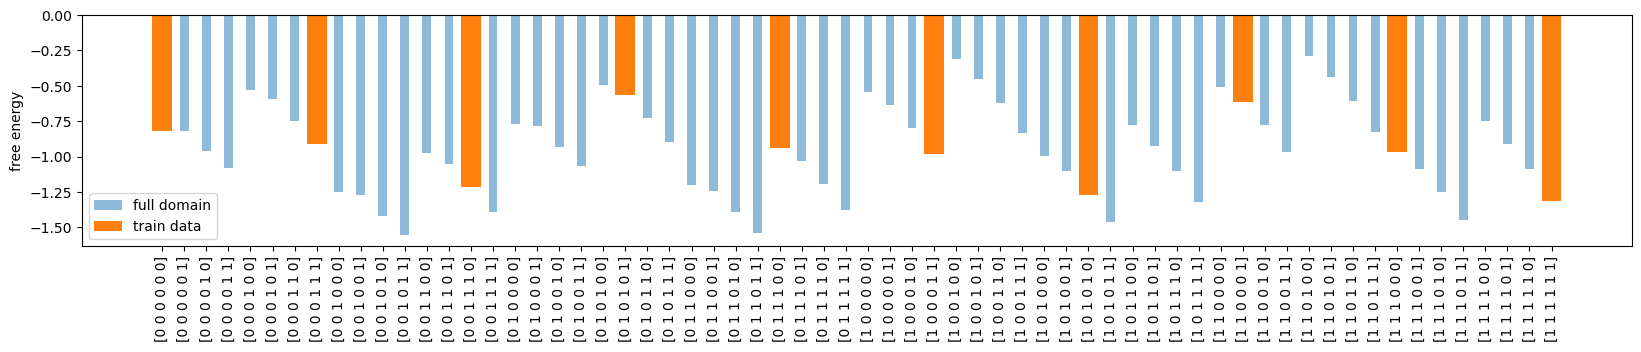

In [21]:
rbm = BernoulliRBM(n_components=dim_H, batch_size=1, learning_rate=.1,n_iter=100, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
plot_free_energy(X_domain, X_train, c, b, W)

sin embargo, con potencias de dos, el RBM construye fácilmente la distribución.

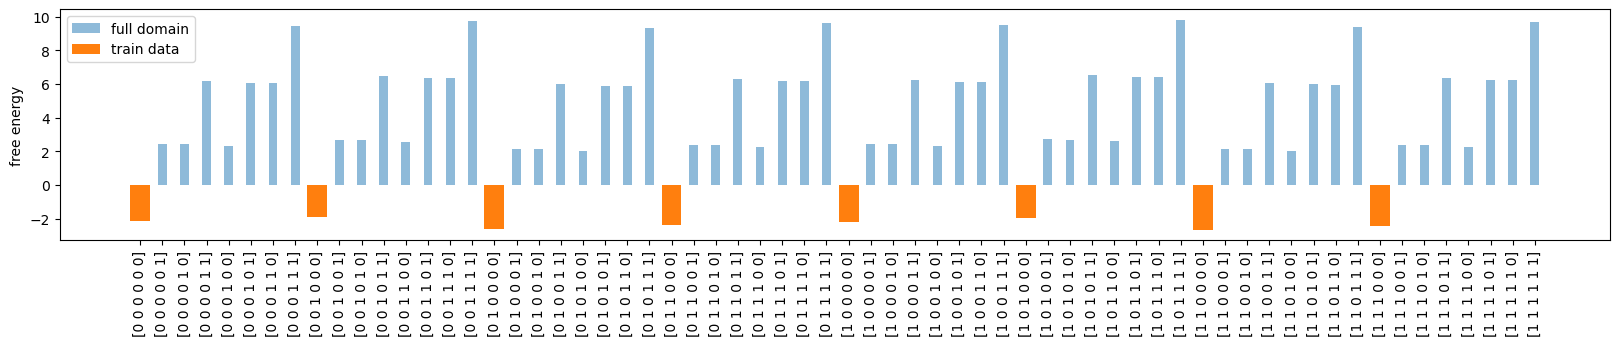

In [22]:
pattern_modulus = 8
pattern_shift   = 0
X_train = X_domain[[np.sum(i*(2**np.arange(len(i))[::-1]))%pattern_modulus==pattern_shift for i in X_domain]]

rbm = BernoulliRBM(n_components=dim_H, batch_size=1, learning_rate=.1,n_iter=100, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_
plot_free_energy(X_domain, X_train, c, b, W)

### podemos tomar muestras de la distribución creada para diferentes valores de H

Ahora estamos **generando datos de entrada!!!**. Por ejemplo, cuando h=[0,0], le pedimos al RBM: _generar vectores de entrada que muestreen la distribución aprendida cuando h=[0,0]_, es decir, muestrear de:

$$P(v|h=[0,0])$$


En el código siguiente, para cada valor de $h$ generamos 100 muestras de entrada y mostramos el número promedio de veces que se activó cada neurona de entrada en las muestras generadas.

Observe las distribuciones de las neuronas activas de las entradas generadas.

- con `pattern_modulus = 8`, `pattern_shift = 0`, el patrón de entrada que emerge es `[1,1,1,0,0,0]`
- con `pattern_modulus = 8`, `pattern_shift = 1`, el patrón de entrada que emerge es `[1,1,1,0,0,1]`
- con `pattern_modulus = 8`, `pattern_shift = 2`, el patrón de entrada que emerge es `[1,1,1,0,1,0]`
- con `pattern_modulus = 16`, `pattern_shift = 2`, el patrón de entrada que emerge es `[1,1,0,0,1,0]`

In [23]:
def plot_h_distrib(rbm, h):
    k = rbm._sample_visibles(np.r_[[h]*100], np.random.RandomState(np.random.randint(100))).mean(axis=0)
    plt.bar(list(range(len(k))), k)
    plt.xlabel("activation for input neurons")
    plt.ylabel("probability, $P(v|h)$")
    plt.title("hidden patern h=%s"%(str(h)))

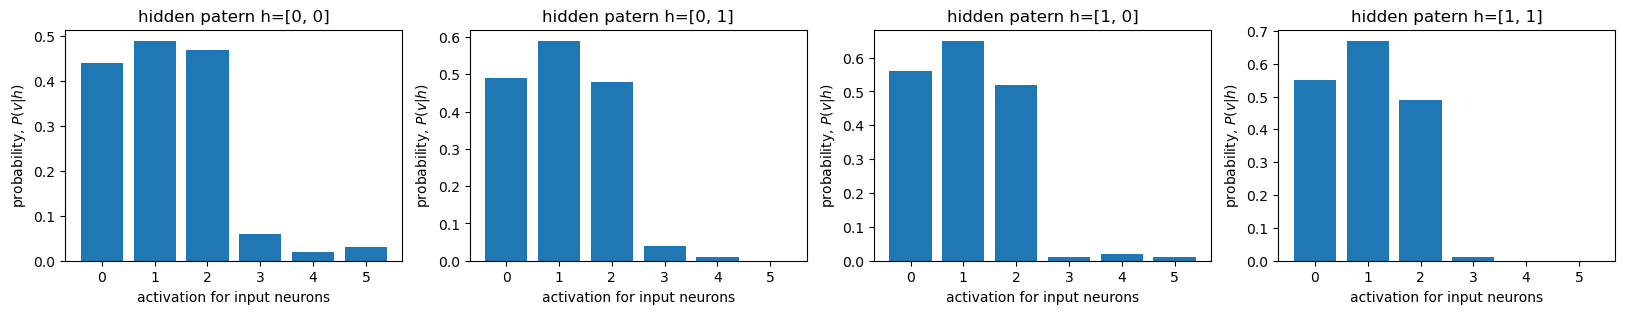

In [24]:
plt.figure(figsize=(20,3))
for i, h in enumerate([[0,0], [0,1], [1,0], [1,1]]):
    plt.subplot(1,4,i+1)
    plot_h_distrib(rbm, h)

### **Ejemplo 1**

In [6]:
import numpy as np


In [7]:
class BoltzmannMachine:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = np.random.normal(loc=0.0, scale=0.01, size=(num_visible, num_hidden))
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def energy(self, visible_state, hidden_state):
        return -np.dot(visible_state, self.visible_bias) - np.dot(hidden_state, self.hidden_bias) - np.dot(
            np.dot(visible_state, self.weights), hidden_state)

    def sample_hidden(self, visible_state):
        hidden_probabilities = self.sigmoid(np.dot(visible_state, self.weights) + self.hidden_bias)
        return np.random.binomial(1, hidden_probabilities)

    def sample_visible(self, hidden_state):
        visible_probabilities = self.sigmoid(np.dot(hidden_state, self.weights.T) + self.visible_bias)
        return np.random.binomial(1, visible_probabilities)

    def gibbs_sampling(self, visible_state, k=1):
        for _ in range(k):
            hidden_state = self.sample_hidden(visible_state)
            visible_state = self.sample_visible(hidden_state)
        return visible_state

    def train(self, data, epochs=10, learning_rate=0.1, k=1):
        num_samples = data.shape[0]
        for epoch in range(epochs):
            for sample in range(num_samples):
                visible_state = data[sample]
                hidden_state = self.sample_hidden(visible_state)
                reconstructed_visible = self.gibbs_sampling(visible_state, k)
                self.weights += learning_rate * (
                        np.outer(visible_state, hidden_state) - np.outer(reconstructed_visible, hidden_state))
                self.visible_bias += learning_rate * (visible_state - reconstructed_visible)
                self.hidden_bias += learning_rate * (hidden_state - self.sample_hidden(reconstructed_visible))

    def reconstruct(self, visible_state, steps=100):
        for _ in range(steps):
            hidden_state = self.sample_hidden(visible_state)
            visible_state = self.sample_visible(hidden_state)
        return visible_state

In [8]:
# Sample Data
data = np.array([[1, 0, 0, 1, 1],
                 [1, 0, 1, 1, 0],
                 [1, 1, 0, 0, 1],
                 [0, 1, 1, 0, 0]])

num_visible = data.shape[1]
num_hidden = 3

In [10]:
# Create and Train Boltzmann Machine
bm = BoltzmannMachine(num_visible, num_hidden)
bm.train(data, epochs=100, learning_rate=0.1, k=1)

In [11]:
# Reconstruct Images
for i in range(len(data)):
    original_image = data[i]
    reconstructed_image = bm.reconstruct(original_image)
    print(f"Original Image: {original_image}")
    print(f"Reconstructed Image: {reconstructed_image}")
    print()

Original Image: [1 0 0 1 1]
Reconstructed Image: [0 1 1 0 0]

Original Image: [1 0 1 1 0]
Reconstructed Image: [1 0 1 1 0]

Original Image: [1 1 0 0 1]
Reconstructed Image: [1 0 1 1 1]

Original Image: [0 1 1 0 0]
Reconstructed Image: [1 0 0 1 1]



### **Ejemplo 2**

2024-04-05 16:56:35.375770: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 16:56:35.376856: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/proci/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  s

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


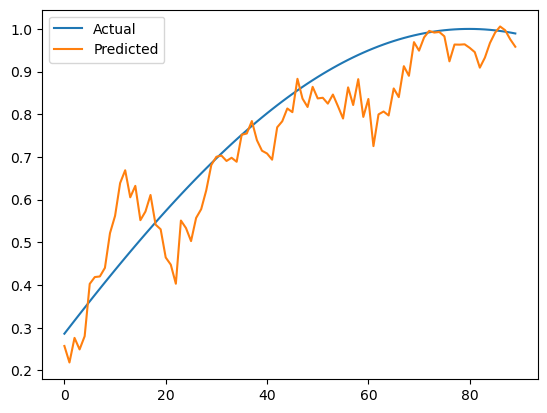

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate some example time series data
np.random.seed(42)
n_samples = 500
time = np.linspace(0, 8, n_samples)
y = np.sin(time)
y_noisy = y + 0.3*np.random.normal(size=n_samples)

# Apply some simple feature extraction (taking the last 10 points as features)
n_features = 10
X = np.zeros((n_samples - n_features, n_features))
for i in range(n_samples - n_features):
    X[i] = y_noisy[i:i+n_features]

# Use MinMaxScaler to scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply RBM for feature extraction
rbm = BernoulliRBM(n_components=2)
X_transformed = rbm.fit_transform(X_scaled)

# Reshape the data for LSTM
X_transformed = X_transformed.reshape((X_transformed.shape[0], X_transformed.shape[1], 1))

# Split into train and test sets
n_train = 400
X_train, X_test = X_transformed[:n_train], X_transformed[n_train:]
y_train, y_test = y[n_features:n_train+n_features], y[n_train+n_features:]

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_transformed.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=200, verbose=0)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate some example time series data
np.random.seed(42)
n_samples = 500
time = np.linspace(0, 8, n_samples)
y = np.sin(time)
y_noisy = y + 0.3*np.random.normal(size=n_samples)

# Apply some simple feature extraction (taking the last 10 points as features)
n_features = 10
X = np.zeros((n_samples - n_features, n_features))
for i in range(n_samples - n_features):
    X[i] = y_noisy[i:i+n_features]

# Use MinMaxScaler to scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply RBM for feature extraction
rbm = BernoulliRBM(n_components=2)
X_transformed = rbm.fit_transform(X_scaled)
print(X_scaled.shape)
X_transformed.shape


(490, 10)


(490, 2)